In [1]:
import sys
sys.path.insert(0, '/home/package/file/path')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# test custom logistic regression with L1 and L2 regularization
from linear_model import LogisticRegression, standardize_features, auc_roc_curve, minimizing_cost_func_curve

#### For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [3]:
colnames = ['nop','pgc','dbp','tsft','2hsi','bmi','dpf','age','class']
data = pd.read_csv('../datasets/pima_indians_diabetes/pima-indians-diabetes.csv', names=colnames)
data.head()

,nop,pgc,dbp,tsft,2hsi,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
n = len(data.columns) - 1
X_train = standardize_features(data.iloc[:, :n])
y_train = np.array(data.iloc[:, -1:])

In [5]:
X_train.head()

,nop,pgc,dbp,tsft,2hsi,bmi,dpf,age
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483


## Create LogisticRegression Instance
#### Default Parameters
* learning_rate=0.01
* n_epoch=100
* penalty=None
* C=0.01
* tolerance=1e-4
* pred_threshold=0.5

In [6]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

In [7]:
predictions = logit.predict(X_train)
print("Class predictions:")
print(predictions[:10])
print()

predict_probabilities = logit.predict_proba(X_train)
print("Class prediction probabilities for Class=1:")
print(predict_probabilities[:10])
print()

print("Number of epoch iteration before early stopping:")
print(logit.n_epoch_reached_)
print()

print("Weights (aka Coefficietns):")
print(logit.thetas_)

Class predictions:
[1 0 1 0 1 0 0 1 0 0]

Class prediction probabilities for Class=1:
[0.80550489 0.02909389 0.94484125 0.01746098 0.66211122 0.27984728
 0.03024174 0.88722906 0.34032575 0.21794706]

Number of epoch iteration before early stopping:
100

Weights (aka Coefficietns):
[-1.0004151520056035, 0.7738638131525422, 1.2798725825730801, -0.3217169475995069, -0.4210057082544807, -0.5149004775543593, 0.6173278341332067, 0.24510284555974887, 0.47310367299233463]


In [8]:
logit.confusion_matrix(y_train, logit.pred_)

{'TP': 147, 'FN': 121, 'TN': 419, 'FP': 81}

In [9]:
logit.model_eval(y_train, logit.pred_, logit.pred_proba_)

{'accuracy': 0.7369791666666666,
 'precision': 0.6447368421052632,
 'recall (TPR/sensitivity)': 0.5485074626865671,
 'specificity (TNR)': 0.838,
 'false_positive_rate': 0.162,
 'f1_score': 0.5927419354838709,
 'auc_roc': array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.])}

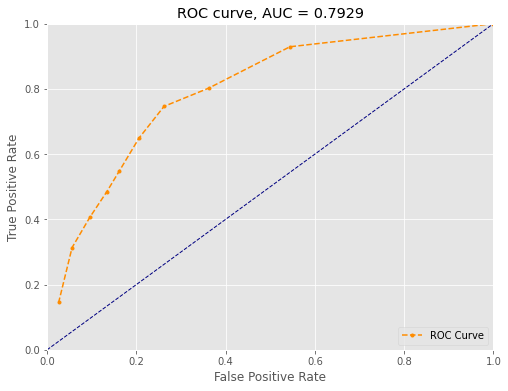

In [10]:
auc_roc_curve(y_train, logit.pred_proba_)

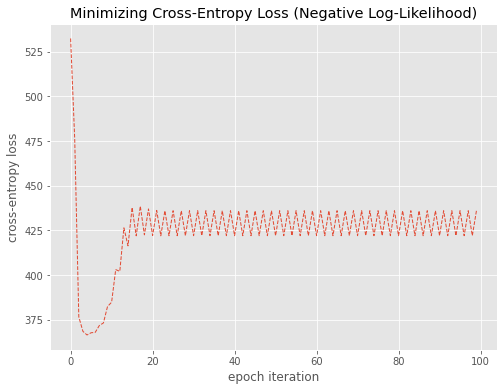

In [11]:
costs = logit.costs_
n_epoch_reached = logit.n_epoch_reached_

minimizing_cost_func_curve(logit.costs_, logit.n_epoch_reached_)

#### Minimizing the cross-entropy loss function. 
Approximately after the 10th epoch iteration, the cross-entropy loss value starts to oscillate. If the features are standardized or normalized, most likely the learning_rate might be a bit large and not able to converte. Trying a smaller learning_rate should help converge and minimize the cost function.